In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 

In [7]:
sns.set_style('darkgrid')

In [8]:
df = pd.read_csv('kyphosis.csv')

In [9]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


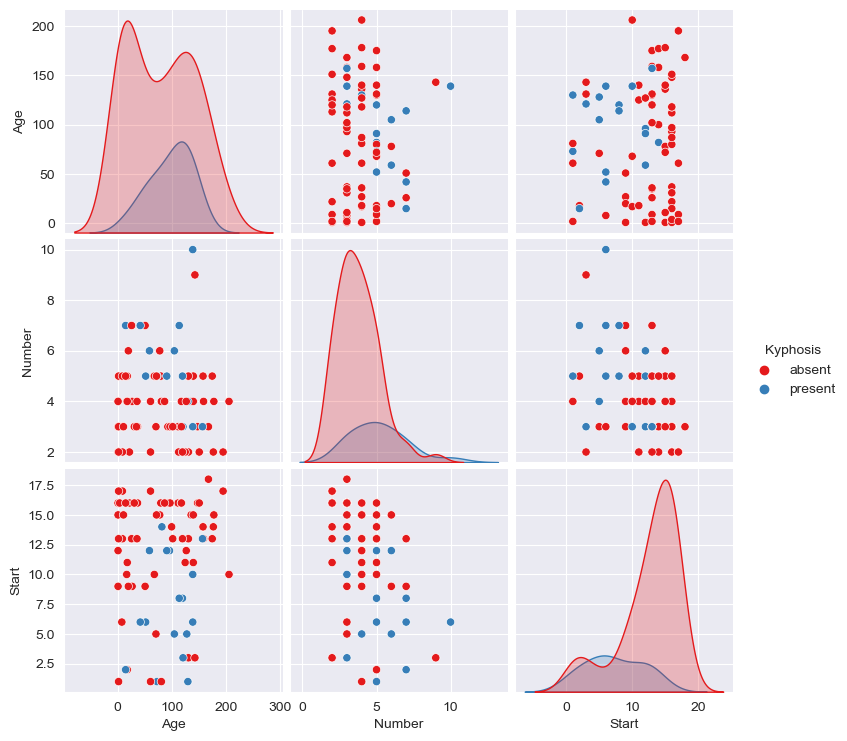

In [20]:
sns.pairplot(df, hue='Kyphosis', palette='Set1')

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X = df.drop('Kyphosis', axis=1)
y = df['Kyphosis']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
dtree = DecisionTreeClassifier()

In [32]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [33]:
predictions = dtree.predict(X_test)

In [34]:
from sklearn.metrics import classification_report,confusion_matrix

In [35]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[14  2]
 [ 6  3]]
              precision    recall  f1-score   support

      absent       0.70      0.88      0.78        16
     present       0.60      0.33      0.43         9

    accuracy                           0.68        25
   macro avg       0.65      0.60      0.60        25
weighted avg       0.66      0.68      0.65        25



In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
rfc = RandomForestClassifier(n_estimators=200)

In [39]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [40]:
rfc_pred = rfc.predict(X_test)

In [43]:
print(confusion_matrix(y_test, rfc_pred))
print(classification_report(y_test, rfc_pred))

[[15  1]
 [ 7  2]]
              precision    recall  f1-score   support

      absent       0.68      0.94      0.79        16
     present       0.67      0.22      0.33         9

    accuracy                           0.68        25
   macro avg       0.67      0.58      0.56        25
weighted avg       0.68      0.68      0.63        25



In [44]:
df['Kyphosis'].value_counts()

absent     64
present    17
Name: Kyphosis, dtype: int64